In [2]:
import pandas as pd

# df = pd.read_csv('/cephfs/home/lc865/workspace/similar-expressions/src/SR_benchmarking/dataset/PySR-difficultEquations_sympy_processed.csv')
df = pd.read_csv('/cephfs/home/lc865/workspace/similar-expressions/src/SR_benchmarking/dataset/PySR-univariate_sympy_processed.csv')

df.head()

,original_complexity,original_equation,calculated_original_complexity,sympy_converted_equation,sympy_converted_complexity,simplified_equation,simplified_complexity,processing_error
0,7,y = 0.2304638568406269 - (x / (x + x)),4,-0.2695361431593731,1.0,-0.2695361431593731,1.0,NaN
1,14,y = (-3.25998550029729 * sqrt(x * x)) + (0.30...,11,-3.25998550029729*sqrt(x**2) - cos(exp(-0.6689...,13.0,-3.25998550029729*sqrt(x**2) - cos(exp(-0.6689...,13.0,NaN
2,27,y = ((((1.0906690515890725 + x) + (x * sqrt(x...,20,-1.075387998227202*x - 0.3966935542712157*(x**...,24.0,-(x**(5/4)*(1.075387998227202*x + 0.9400898734...,35.0,NaN
3,8,y = ((x * -0.6395710496597933) - x) - sqrt(x),5,-sqrt(x) - 1.639571049659793*x,5.0,-sqrt(x) - 1.639571049659793*x,5.0,NaN
4,25,y = exp(((-0.3741726321384304 * x) * exp(x - ...,16,x**(1/4)*exp(-1.37417263213843*x),9.0,x**(1/4)*exp(-1.37417263213843*x),9.0,NaN


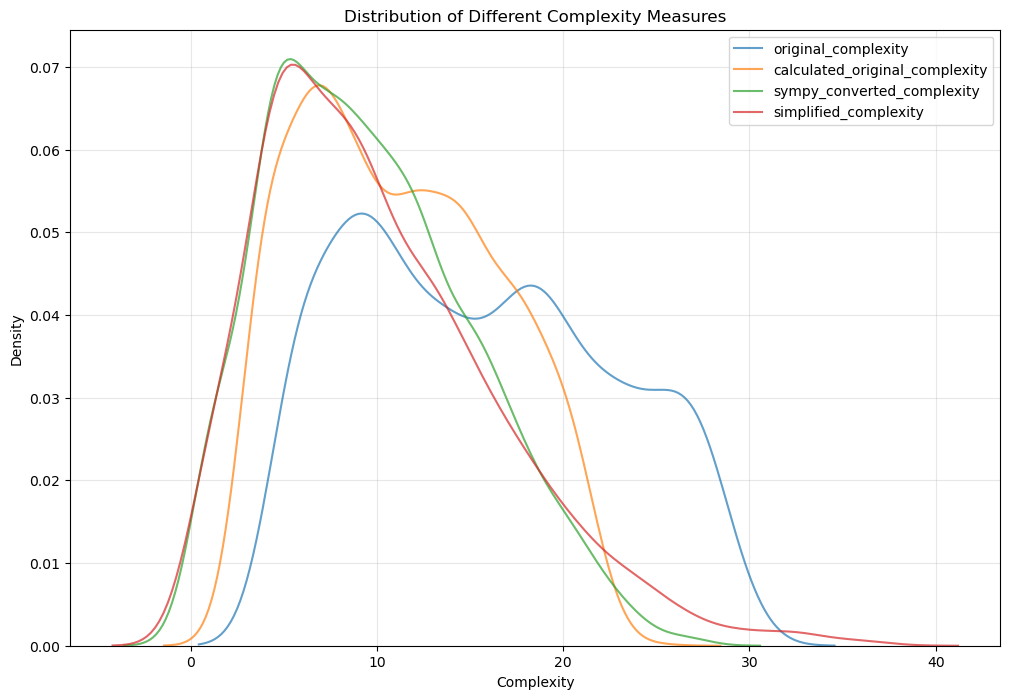

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df['original_complexity'].dropna(), alpha=0.7, label='original_complexity')
sns.kdeplot(data=df['calculated_original_complexity'].dropna(), alpha=0.7, label='calculated_original_complexity')
sns.kdeplot(data=df['sympy_converted_complexity'].dropna(), alpha=0.7, label='sympy_converted_complexity')
sns.kdeplot(data=df['simplified_complexity'].dropna(), alpha=0.7, label='simplified_complexity')
plt.xlabel('Complexity')
plt.ylabel('Density')
plt.title('Distribution of Different Complexity Measures')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
print(df.columns)
df.head()

Index(['original_complexity', 'original_equation',
       'calculated_original_complexity', 'sympy_converted_equation',
       'sympy_converted_complexity', 'simplified_equation',
       'simplified_complexity', 'processing_error'],
      dtype='object')


,original_complexity,original_equation,calculated_original_complexity,sympy_converted_equation,sympy_converted_complexity,simplified_equation,simplified_complexity,processing_error
0,7,y = 0.2304638568406269 - (x / (x + x)),4,-0.2695361431593731,1.0,-0.2695361431593731,1.0,NaN
1,14,y = (-3.25998550029729 * sqrt(x * x)) + (0.30...,11,-3.25998550029729*sqrt(x**2) - cos(exp(-0.6689...,13.0,-3.25998550029729*sqrt(x**2) - cos(exp(-0.6689...,13.0,NaN
2,27,y = ((((1.0906690515890725 + x) + (x * sqrt(x...,20,-1.075387998227202*x - 0.3966935542712157*(x**...,24.0,-(x**(5/4)*(1.075387998227202*x + 0.9400898734...,35.0,NaN
3,8,y = ((x * -0.6395710496597933) - x) - sqrt(x),5,-sqrt(x) - 1.639571049659793*x,5.0,-sqrt(x) - 1.639571049659793*x,5.0,NaN
4,25,y = exp(((-0.3741726321384304 * x) * exp(x - ...,16,x**(1/4)*exp(-1.37417263213843*x),9.0,x**(1/4)*exp(-1.37417263213843*x),9.0,NaN


In [5]:
df_orig = pd.read_csv('/cephfs/home/lc865/workspace/similar-expressions/src/SR_benchmarking/dataset/PySR-univariate.csv')
print(df_orig.columns)
df_orig.head()

Index(['true_complexity', 'true_equation'], dtype='object')


,true_complexity,true_equation
0,7,y = 0.2304638568406269 - (x / (x + x)) ...
1,14,y = (-3.25998550029729 * sqrt(x * x)) + (0.30...
2,27,y = ((((1.0906690515890725 + x) + (x * sqrt(x...
3,8,y = ((x * -0.6395710496597933) - x) - sqrt(x)...
4,25,y = exp(((-0.3741726321384304 * x) * exp(x - ...


In [7]:
df_orig.rename(columns={'true_complexity': 'complexity_multivar'}, inplace=True)
# df_orig = df_orig[['true_equation']]
df_orig[['complexity_simplified', 'equation_simplified']] = df[['sympy_converted_complexity', 'sympy_converted_equation']]
df_orig.dropna(inplace=True)
df_orig['complexity_simplified'] = df_orig['complexity_simplified'].astype(int)
df_orig = df_orig[['true_equation', 'equation_simplified', 'complexity_multivar', 'complexity_simplified']]


In [8]:
df_orig.head()

,true_equation,equation_simplified,complexity_multivar,complexity_simplified
0,y = 0.2304638568406269 - (x / (x + x)) ...,-0.2695361431593731,7,1
1,y = (-3.25998550029729 * sqrt(x * x)) + (0.30...,-3.25998550029729*sqrt(x**2) - cos(exp(-0.6689...,14,13
2,y = ((((1.0906690515890725 + x) + (x * sqrt(x...,-1.075387998227202*x - 0.3966935542712157*(x**...,27,24
3,y = ((x * -0.6395710496597933) - x) - sqrt(x)...,-sqrt(x) - 1.639571049659793*x,8,5
4,y = exp(((-0.3741726321384304 * x) * exp(x - ...,x**(1/4)*exp(-1.37417263213843*x),25,9
